### Determine 
Given a bank customer, build a neural network-based classifier that can determine whether
they will leave or not in the next 6 months.
Dataset Description: The case study is from an open-source dataset from Kaggle.
The dataset contains 10,000 sample points with 14 distinct features such as
CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project:
https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling
Perform following steps:
1. Read the dataset.
2. Distinguish the feature and target set and divide the data set into training and test sets.
3. Normalize the train and test data.
4. Initialize and build the model. Identify the points of improvement and implement the same.
5. Print the accuracy score and confusion matrix (5 points).

In [20]:
import pandas as pd
import numpy as np

In [21]:
ds = pd.read_csv("churn_modelling.csv")
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
# check for null values
ds.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [23]:
# Remove attributes that are unique to the customer (attributes belonging to candidate keys)
ds.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

# binary encoding for gender
ds.loc[ds["Gender"] == "Male", ["Gender"]] = 0
ds.loc[ds["Gender"] == "Female", ["Gender"]] = 1

# one hot enc. geography
ds = pd.get_dummies(ds, columns=["Geography"], dtype='int32')

In [25]:
def min_max_normalize( name ):
    global ds
    ds[name] = ds[name].astype('float32')
    ds[name] = (ds[name] - ds[name].min()) - (ds[name].max() - ds[name].min())

cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "EstimatedSalary"]
for col in cols:
    min_max_normalize(col)

#### Model Training

In [26]:
from sklearn.model_selection import train_test_split 
X = ds.drop(["Exited"], axis=1).to_numpy().astype(np.float32) # features 

y = ds["Exited"].to_numpy() # labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




In [37]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=50)
clf.fit(X_train, y_train)

C:\Users\Ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=50,
              random_state=1, solver='lbfgs')

#### Model Validation

In [36]:
from sklearn.metrics import accuracy_score

pred_y = clf.predict(X_test)
print(f"Accuracy is {accuracy_score(y_test, pred_y)}")

Accuracy is 0.19466666666666665


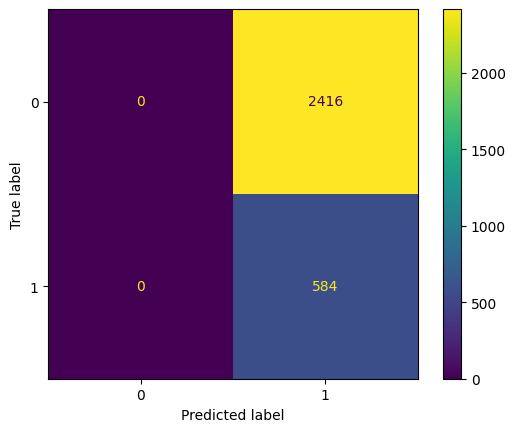

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()